In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [2]:
def history_train_test_timewise_split(data,column,history_start_date='2010-01-01',history_end_date='2050-12-31',train_start_date='2010-01-01',train_end_date='2050-12-31',test_start_date='2010-01-01',test_end_date='2050-12-31'): 
    import pandas as pd
    try:
        history_start_date=pd.to_datetime(history_start_date)
        history_end_date=pd.to_datetime(history_end_date)
        train_start_date=pd.to_datetime(train_start_date)
        train_end_date=pd.to_datetime(train_end_date)
        test_start_date=pd.to_datetime(test_start_date)
        test_end_date=pd.to_datetime(test_end_date)
    except:
        raise ValueError('Either format is incorrect or date is in correct.Dates are expected as string and in "yyyy-mm-dd" format')
        return
    if data[column].isnull().sum()>0:
        raise ValueError('Split column contains null values')
        return
    else:
        data[column]=pd.to_datetime(data[column])
        history=data.loc[(data[column]>=history_start_date)&(data[column]<=history_end_date)]
        train=data.loc[(data[column]>=train_start_date)&(data[column]<=train_end_date)]
        test=data.loc[(data[column]>=test_start_date)&(data[column]<=test_end_date)]
        left_history=data.loc[(data[column]>=history_start_date)&(data[column]<train_start_date)]
        history.reset_index(drop=True,inplace=True)
        train.reset_index(drop=True,inplace=True)
        test.reset_index(drop=True,inplace=True)
        return history,train,left_history,test

In [3]:
dataset = pd.read_csv("covid_19_india.csv",error_bad_lines=False)
dataset_usa = pd.read_csv("us-states.csv",error_bad_lines=False)

In [4]:
dataset.shape

(15806, 9)

In [5]:
dataset_usa.shape

(26084, 5)

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [7]:
raw_dataset = dataset
raw_dataset_usa = dataset_usa

In [8]:
dataset.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [9]:
dataset_usa.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [10]:
dataset.isna().any()

Sno                         False
Date                        False
Time                        False
State/UnionTerritory        False
ConfirmedIndianNational     False
ConfirmedForeignNational    False
Cured                       False
Deaths                      False
Confirmed                   False
dtype: bool

In [11]:
dataset_usa.isna().any()

date      False
state     False
fips      False
cases     False
deaths    False
dtype: bool

In [12]:
cured = dataset.Cured.sum()
deaths = dataset.Deaths.sum()
Confirmed = dataset.Confirmed.sum()

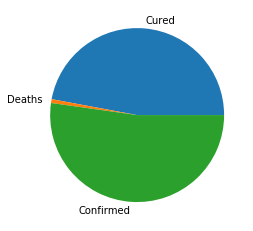

In [13]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([cured, deaths, Confirmed])
mylabels = ['Cured', 'Deaths', 'Confirmed']

plt.pie(y,labels = mylabels)
plt.show() 

In [14]:
deaths_usa = dataset_usa.deaths.sum()
Confirmed_usa = dataset_usa.cases.sum()

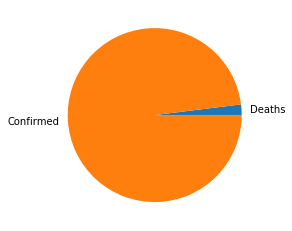

In [15]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([deaths_usa, Confirmed_usa])
mylabels = ['Deaths', 'Confirmed']

plt.pie(y,labels = mylabels)
plt.show() 

In [16]:
Confirmed_cases_inSates = dataset.groupby(['Date'])['Confirmed'].apply(lambda x : x.astype(float).sum())

In [17]:
lst = {'date' : Confirmed_cases_inSates.keys(),
      'Confirmed':Confirmed_cases_inSates.values}
graph_india = pd.DataFrame(lst)
#graph_india

Text(0, 0.5, 'Confirmed cases')

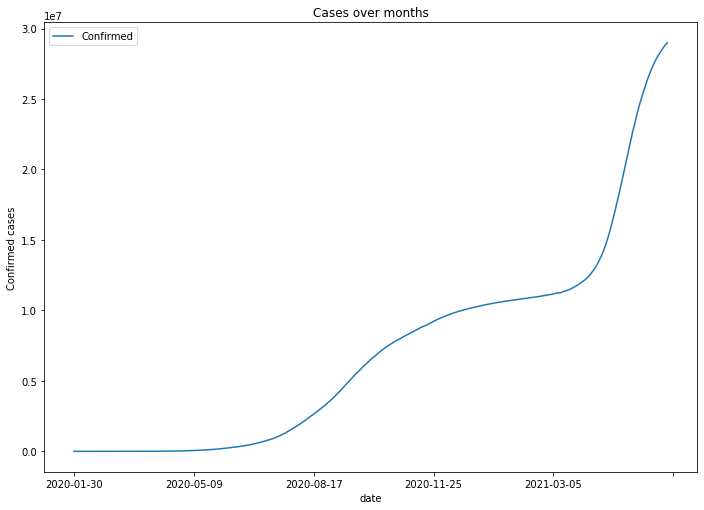

In [18]:
a4_dims = (11.7, 8.27)
graph_india[['date','Confirmed']].set_index('date').plot(figsize=a4_dims).set_title('Cases over months')
plt.ylabel('Confirmed cases')

In [19]:
Confirmed_cases_inUSA = dataset_usa.groupby(['date'])['cases'].apply(lambda x : x.astype(float).sum())

In [20]:
lst = {'date' : Confirmed_cases_inUSA.keys(),
      'Confirmed':Confirmed_cases_inUSA.values}
graph_usa = pd.DataFrame(lst)

Text(0, 0.5, 'Confirmed cases')

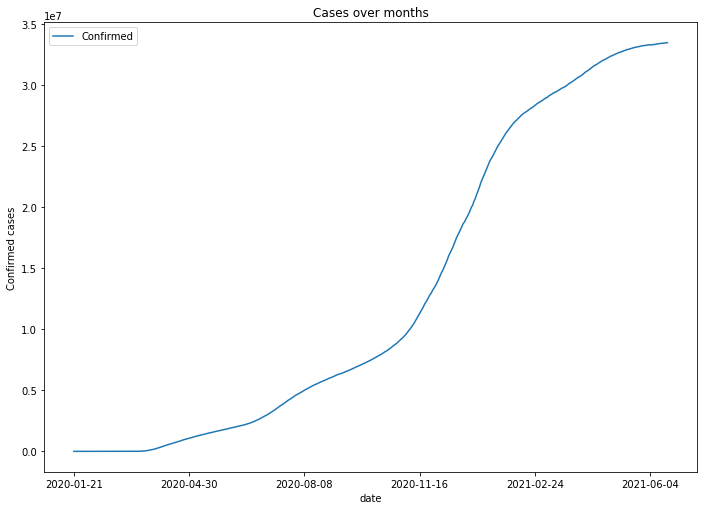

In [21]:
a4_dims = (11.7, 8.27)
graph_usa[['date','Confirmed']].set_index('date').plot(figsize=a4_dims).set_title('Cases over months')
plt.ylabel('Confirmed cases')

In [22]:
Deaths_inSates = dataset.groupby(['Date'])['Deaths'].apply(lambda x : x.astype(float).sum())

In [23]:
lst = {'date' : Deaths_inSates.keys(),
      'deaths':Deaths_inSates.values}
graph_india = pd.DataFrame(lst)
#graph_india

Text(0, 0.5, 'Death cases')

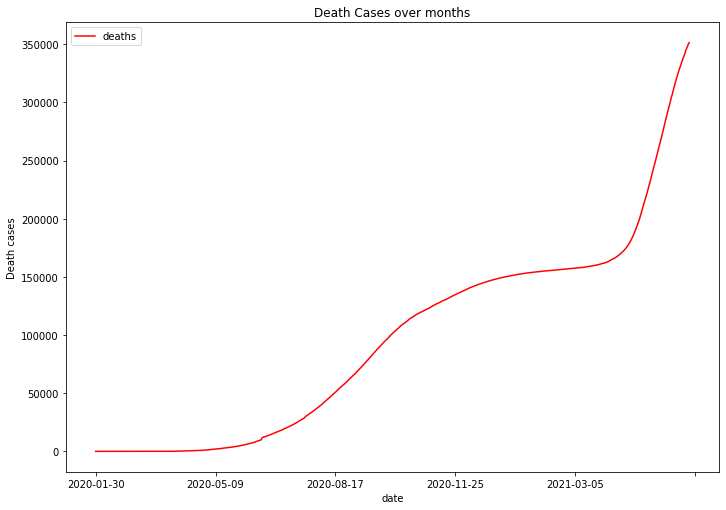

In [24]:
a4_dims = (11.7, 8.27)
graph_india[['date','deaths']].set_index('date').plot(figsize=a4_dims,color = 'red').set_title('Death Cases over months')
plt.ylabel('Death cases')

In [109]:
deaths_usa = dataset_usa.groupby(['date'])['deaths'].apply(lambda x : x.astype(float).sum())

In [110]:
lst = {'date' : deaths_usa.keys(),
      'deaths':deaths_usa.values}
graph_usa = pd.DataFrame(lst)

Text(0, 0.5, 'Death cases')

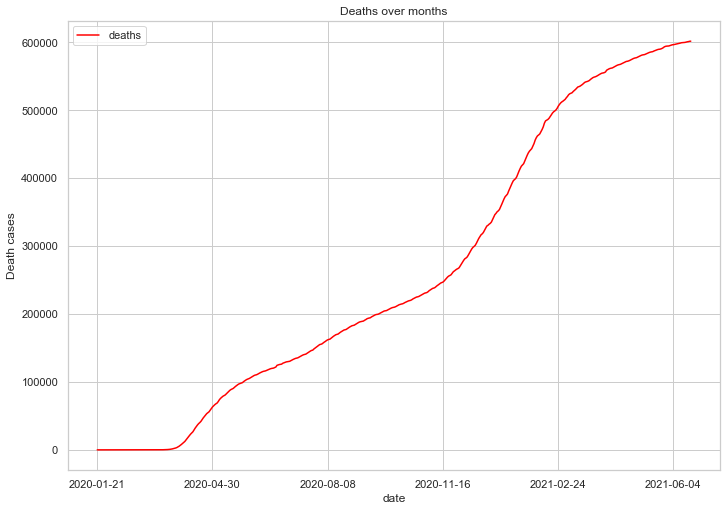

In [112]:
a4_dims = (11.7, 8.27)
graph_usa[['date','deaths']].set_index('date').plot(figsize=a4_dims,color = 'red').set_title('Deaths over months')
plt.ylabel('Death cases')

In [27]:
Confirmed_cases_inSates = dataset.groupby(['State/UnionTerritory'])['Confirmed'].apply(lambda x : x.astype(float).sum())
Confirmed_cases_inSates

State/UnionTerritory
Andaman and Nicobar Islands                   1461311.0
Andhra Pradesh                              270440364.0
Arunachal Pradesh                             4619157.0
Assam                                        66322683.0
Bihar                                        87441641.0
Cases being reassigned to states               345565.0
Chandigarh                                    6910907.0
Chhattisgarh                                100013893.0
Dadra and Nagar Haveli                          20722.0
Dadra and Nagar Haveli and Daman and Diu      1261966.0
Daman & Diu                                         2.0
Delhi                                       195424519.0
Goa                                          17505108.0
Gujarat                                      90718675.0
Haryana                                      85157065.0
Himachal Pradesh                             17238921.0
Jammu and Kashmir                            37858229.0
Jharkhand                  

In [28]:
lst = {'State/UnionTerritory' : Confirmed_cases_inSates.keys(),
      'Confirmed':Confirmed_cases_inSates.values}
Confirmed_cases_inSates_data = pd.DataFrame(lst)
Confirmed_cases_inSates_data = Confirmed_cases_inSates_data.sort_values(by = 'Confirmed',ascending = False)
Confirmed_cases_inSates_data

,State/UnionTerritory,Confirmed
23,Maharashtra,735227925.0
18,Karnataka,306212399.0
33,Tamil Nadu,272629006.0
1,Andhra Pradesh,270440364.0
19,Kerala,262232084.0
38,Uttar Pradesh,203417849.0
11,Delhi,195424519.0
40,West Bengal,166859631.0
31,Rajasthan,101417133.0
28,Odisha,100831625.0


In [29]:
top_five_states = Confirmed_cases_inSates_data[:5]
top_five_states

,State/UnionTerritory,Confirmed
23,Maharashtra,735227925.0
18,Karnataka,306212399.0
33,Tamil Nadu,272629006.0
1,Andhra Pradesh,270440364.0
19,Kerala,262232084.0


In [30]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\lenovo\anaconda3\lib\site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


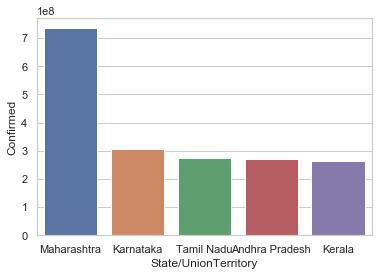

In [31]:
sns.set_theme(style="whitegrid")
sns.barplot(x = 'State/UnionTerritory',
            y = 'Confirmed',
            data = top_five_states)

In [32]:
Confirmed_cases_inUSA = dataset_usa.groupby(['state'])['cases'].apply(lambda x : x.astype(float).sum())
#Confirmed_cases_inUSA

In [33]:
lst = {'State' : Confirmed_cases_inUSA.keys(),
      'Confirmed':Confirmed_cases_inUSA.values}
Confirmed_cases_inUSA_data = pd.DataFrame(lst)
Confirmed_cases_inUSA_data = Confirmed_cases_inUSA_data.sort_values(by = 'Confirmed',ascending = False)
Confirmed_cases_inUSA_data[:10]

,State,Confirmed
4,California,775387132.0
46,Texas,613309251.0
9,Florida,477903373.0
33,New York,425368912.0
14,Illinois,292994775.0
10,Georgia,230432546.0
40,Pennsylvania,219116980.0
37,Ohio,213311740.0
31,New Jersey,203162414.0
34,North Carolina,195407263.0


In [34]:
top_five_states_USA = Confirmed_cases_inUSA_data[:5]
top_five_states_USA

,State,Confirmed
4,California,775387132.0
46,Texas,613309251.0
9,Florida,477903373.0
33,New York,425368912.0
14,Illinois,292994775.0


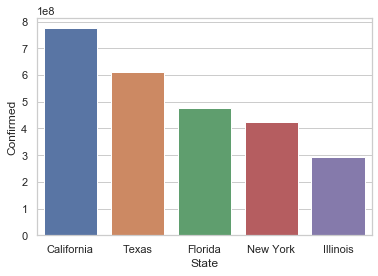

In [35]:
sns.set_theme(style="whitegrid")
sns.barplot(x = 'State',
            y = 'Confirmed',
            data = top_five_states_USA)
plt.show()

In [36]:
no_use = ['Sno','Time']

In [37]:
dataset.drop(columns = no_use, inplace = True)
print("The shape of remaining data: ",dataset.shape)

The shape of remaining data:  (15806, 7)


In [38]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dataset['State/UnionTerritory']= label_encoder.fit_transform(dataset['State/UnionTerritory'])
  
dataset['State/UnionTerritory'].unique()

array([19, 35, 11, 31, 38, 14, 20, 33, 18, 23, 30, 16,  1, 39, 28, 29, 40,
        7,  6, 13, 15, 22,  4, 24, 26,  0, 12, 37,  3, 17,  2, 36, 27, 25,
        9,  5, 32, 10, 21, 34,  8])

In [39]:
max(dataset['Date'])

'2021-06-08'

In [40]:
min(dataset['Date'])

'2020-01-30'

In [41]:
dispute_history,train,left_history,test=history_train_test_timewise_split(dataset.copy(),
                                                                 'Date',
                                                                 history_start_date='2020-01-30',
                                                                 history_end_date='2021-06-08',
                                                                 train_start_date='2020-01-30',
                                                                 train_end_date='2021-03-15',
                                                                 test_start_date='2021-03-16',
                                                                  #test_end_date='2019-05-12'
                                                                 )

In [42]:
print("Shape of dispute_history: ",dispute_history.shape)
print("Shape of train: ",train.shape)
print("Shape of left_history: ",left_history.shape)
print("Shape of test: ",test.shape)

Shape of dispute_history:  (15806, 7)
Shape of train:  (12746, 7)
Shape of left_history:  (0, 7)
Shape of test:  (3060, 7)


In [43]:
print("Percentage of data in train: ",((train.shape[0]/dispute_history.shape[0])*100))
print("Percentage of data in test: ",((test.shape[0]/dispute_history.shape[0])*100))

Percentage of data in train:  80.64026319119321
Percentage of data in test:  19.359736808806783


In [44]:
# Date features
# date features
def date_features(train, dispute_history, test, date_col):
    train['weekday'] = train[date_col].dt.weekday
    
    dispute_history['weekday'] = dispute_history[date_col].dt.weekday
    
    test['weekday'] = test[date_col].dt.weekday
    
    return train, dispute_history, test

# forming the date features
train, dispute_history, test = date_features(train, dispute_history, test, 'Date')

In [45]:
train.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,weekday
0,2020-01-30,19,1,0,0,0,1,3
1,2020-01-31,19,1,0,0,0,1,4
2,2020-02-01,19,2,0,0,0,2,5
3,2020-02-02,19,3,0,0,0,3,6
4,2020-02-03,19,3,0,0,0,3,0


In [46]:
res = train['Confirmed']

In [47]:
res_test = test['Confirmed']

In [48]:
test.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,weekday
0,2021-03-16,1,-,-,883380,7185,892008,1
1,2021-03-16,0,-,-,4966,62,5031,1
2,2021-03-16,2,-,-,16783,56,16840,1
3,2021-03-16,3,-,-,215106,1099,217817,1
4,2021-03-16,4,-,-,261171,1552,263051,1


In [49]:
train.drop(columns = ['Date','ConfirmedIndianNational','ConfirmedForeignNational','Confirmed'], inplace = True)

In [50]:
test.drop(columns = ['Date','ConfirmedIndianNational','ConfirmedForeignNational','Confirmed'], inplace = True)

In [51]:
print("The shape of remaining data: ",train.shape)

The shape of remaining data:  (12746, 4)


# Predicting the output

In [52]:
from sklearn import linear_model
reg_linear = linear_model.LinearRegression()

In [53]:
# fit the model to start training.
reg_linear.fit(train, res)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# on test set
pred_test = reg_linear.predict(test)

In [55]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(res_test, pred_test, squared=False)
rms

98977.34741719451

In [56]:
rms/test.shape[0]

32.345538371632195

In [57]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators= 500 ,max_depth=3, random_state=0)
regr.fit(train, res)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [58]:
pred_test = regr.predict(test)

In [59]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

505675.7461059856

In [60]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train,res)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [61]:
pred_test = regressor.predict(test)

In [62]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

444495.2083775563

In [63]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [64]:
regr.fit(train, res)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [65]:
pred_test = regr.predict(test)

In [66]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

979634.2677058203

In [67]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1)

clf.fit(train,res)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [68]:
pred_test = clf.predict(test)

In [69]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

98977.33985271731

In [70]:
rms/test.shape[0]

32.345535899580824

In [71]:
r2_score = clf.score(test,res_test)
print(r2_score*100,'%')

98.60289369667173 %


# Predicting output of USA

In [72]:
dataset_usa.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [73]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dataset_usa['state']= label_encoder.fit_transform(dataset_usa['state'])
  
dataset_usa['state'].unique()

array([51, 14,  4,  2, 22, 53, 46, 28, 47, 39,  9, 33, 42, 10, 30, 34, 31,
        5, 21, 29, 45, 12, 15, 18, 24, 38, 40, 43,  8, 17, 26, 48, 50,  6,
       16, 19, 37, 23, 44,  3,  7, 25, 32, 35, 54,  1, 20,  0, 13, 27, 41,
       49, 11, 52, 36])

In [74]:
max(dataset_usa['date'])

'2021-06-19'

In [75]:
min(dataset_usa['date'])

'2020-01-21'

In [76]:
dispute_history,train,left_history,test=history_train_test_timewise_split(dataset_usa.copy(),
                                                                 'date',
                                                                 history_start_date='2020-01-21',
                                                                 history_end_date='2021-06-19',
                                                                 train_start_date='2020-01-30',
                                                                 train_end_date='2021-03-15',
                                                                 test_start_date='2021-03-16',
                                                                  #test_end_date='2019-05-12'
                                                                 )

In [77]:
print("Shape of dispute_history: ",dispute_history.shape)
print("Shape of train: ",train.shape)
print("Shape of left_history: ",left_history.shape)
print("Shape of test: ",test.shape)

Shape of dispute_history:  (26084, 5)
Shape of train:  (20780, 5)
Shape of left_history:  (24, 5)
Shape of test:  (5280, 5)


In [78]:
print("Percentage of data in train: ",((train.shape[0]/dispute_history.shape[0])*100))
print("Percentage of data in test: ",((test.shape[0]/dispute_history.shape[0])*100))

Percentage of data in train:  79.66569544548382
Percentage of data in test:  20.24229412666769


In [79]:
# Date features
# date features
def date_features(train, dispute_history, test, date_col):
    train['weekday'] = train[date_col].dt.weekday
    
    dispute_history['weekday'] = dispute_history[date_col].dt.weekday
    
    test['weekday'] = test[date_col].dt.day
    
    train['day'] = train[date_col].dt.day
    
    dispute_history['day'] = dispute_history[date_col].dt.weekday
    
    test['day'] = test[date_col].dt.weekday
    
    return train, dispute_history, test

# forming the date features
train, dispute_history, test = date_features(train, dispute_history, test, 'date')

In [80]:
train.head()

,date,state,fips,cases,deaths,weekday,day
0,2020-01-30,2,4,1,0,3,30
1,2020-01-30,4,6,2,0,3,30
2,2020-01-30,14,17,2,0,3,30
3,2020-01-30,51,53,1,0,3,30
4,2020-01-31,2,4,1,0,4,31


In [81]:
res = train['cases']

In [82]:
res_test = test['cases']

In [83]:
train.drop(columns = ['date','fips','cases'], inplace = True)

In [84]:
test.drop(columns = ['date','fips','cases'], inplace = True)

In [85]:
print("The shape of remaining data: ",train.shape)

The shape of remaining data:  (20780, 4)


# Predicting the output

In [86]:
from sklearn import linear_model
reg_linear = linear_model.LinearRegression()

In [87]:
# fit the model to start training.
reg_linear.fit(train, res)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# on test set
pred_test = reg_linear.predict(test)

In [89]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(res_test, pred_test, squared=False)
rms

242915.82906572823

In [90]:
rms/test.shape[0]

46.00678580790307

In [91]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0)
regr.fit(train, res)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [92]:
pred_test = regr.predict(test)

In [93]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

97505.88808553819

In [94]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train,res)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [95]:
pred_test = regressor.predict(test)

In [96]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

139158.3481494794

In [97]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [98]:
regr.fit(train, res)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [99]:
pred_test = regr.predict(test)

In [100]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

883571.4583509888

In [101]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1)

clf.fit(train,res)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [102]:
pred_test = clf.predict(test)

In [103]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

242917.52351210825

In [104]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0)
regr.fit(train, res)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [105]:
pred_test = regr.predict(test)

In [106]:
rms = mean_squared_error(res_test, pred_test, squared=False)
rms

97505.88808553819

In [107]:
rms/test.shape[0]

18.467024258624658

In [108]:
r2_score = clf.score(test,res_test)
print(r2_score*100,'%')

88.15205393648966 %
